### K-Nearest Neighbor Classification

* K-NN is a supervised classifier that memorizes observation from within a labeled test set to predict classification labels for new, unlabeled observations
* K-NN makes predictions based on how similar training observations are to the new, incoming observations.
* The more similar the observations's values, the more likely they will be classified with the same label.

### K-NN Use Cases
* Stock Price Prediction
* Recommendation systems
* Credit risk analysis
* Predictive trip planning

### K-NN Model Assumptions
* Dataset has little noise.
* Dataset is labeled
* Dataset only contains relevant features.
* Dataset has distinguishable subgroups
## Avoid using K-NN on large datasets. it will probably take a long time!

In [16]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import urllib

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import scale


In [17]:
np.set_printoptions(precision=4, suppress=4)
%matplotlib inline
rcParams['figure.figsize']=7,4
plt.style.use('seaborn-darkgrid')

### Splitting your data into test and train datasets

In [18]:
cars = pd.read_csv("mtcars.csv")
cars.columns = ["car_names","mpg","cyl","disp","hp","drat","wt","qsec","vs","am","gear","carb"]

x_prime = cars.loc[:, ("mpg","disp","hp","vs")].values

y = cars.iloc[:, (9)].values

In [19]:
x = preprocessing.scale(x_prime)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.33, random_state=17)

### Building and training your model with training data

In [21]:
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
print(clf)

KNeighborsClassifier()


### Evaluating your model's prediction against the test dataset

In [22]:
y_expect = y_test
y_pred = clf.predict(x_test)

In [23]:
print(metrics.classification_report(y_expect, y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.50      0.67         6

    accuracy                           0.73        11
   macro avg       0.81      0.75      0.72        11
weighted avg       0.83      0.73      0.71        11



### Logistic Regression
* Logistic regression is a simple machine learning method you can use to predict the value of a numeric categorical variable based on its relationship with predictor variables

### Logistic Regression use Cases
* Purchas propensity vs. ad spend analysis
* Customer Churn prediction
* Employess attrition modelling 
* Hazardous event prediction

### Logistic Regression Assumptions
* Data is free of missing values
* The predictant variable is binary (only accepts two values) or ordinal( a category variable with ordered values).
* All predictors are independent of each other.
* There are at least 50 observations per predictor variable (to ensure relaible results).

In [24]:
import scipy
from scipy.stats import spearmanr

from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [25]:
address2 = ('mtcars.csv')
car = pd.read_csv(address2)
car.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [26]:
cars_data = car.loc[:,("drat","carb" )].values
cars_data_names=["drat","carb"]

y = cars.iloc[:,9].values

#### Checking for independence between features

<AxesSubplot:xlabel='drat', ylabel='carb'>

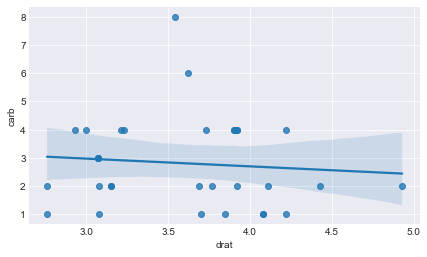

In [28]:
sns.regplot(x="drat", y="carb", data= cars, scatter=True)

In [29]:
drat = car.drat
carb = car.carb

spearmanr_coefficient, p_valve = spearmanr(drat, carb)
print(f"SpearmanR Correlation Coefficeint %.3f" %(spearmanr_coefficient))

SpearmanR Correlation Coefficeint -0.125


### Checking for missing values

In [30]:
car.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

### Checking that the target is binary or ordinal

<AxesSubplot:xlabel='am', ylabel='count'>

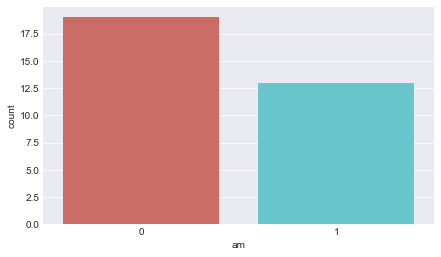

In [31]:
sns.countplot(x="am", data=car, palette="hls")

### Checking that your dataset size is sufficient

In [32]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


### Deploying and evaluating your model

In [35]:
x = scale(cars_data)
LogReg = LogisticRegression()

LogReg.fit(x,y)
print(LogReg.score(x,y))

0.8125


In [36]:
y_pred = LogReg.predict(x)
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.73      0.85      0.79        13

    accuracy                           0.81        32
   macro avg       0.81      0.82      0.81        32
weighted avg       0.82      0.81      0.81        32



### Naive Bayes Classifiers 

* Naive Bayes is a machine learning method you can use to predict the likelihood that an event will occur given evidence that's present in your data.

###### Conditional probablility
P(B|A)= P(A and B) / P(A)

### Types of Naive Bayes Models
* Multinomial - Good for when yoour features (categorical or continuous) describe frequency counts (e.r. word counts)

* Bernoulli - Good for making predictions from binary features

* Gaussian - Good for maing predictions from normally distributed features

### Use cases
* Spam detection
* Customer classification
* Credit risk prediction
* Health risk prediction

### Naive Bayes Assumptions
* Predictors are independent of each other
* A priori assumption: This is an assumption that the past conditions still hold true. When we make predictions from historical values, we will get incorrect results if present circumstances have changed.
* All regression models maintain an a priori assumption as well

In [40]:
import numpy as np
import pandas as pd

import urllib

import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### Naive Bayes

##### Using Naive Bayes to predict spam

In [59]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
raw_data = urllib.request.urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=',')
print(dataset[0])

[  0.      0.64    0.64    0.      0.32    0.      0.      0.      0.
   0.      0.      0.64    0.      0.      0.      0.32    0.      1.29
   1.93    0.      0.96    0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.778   0.      0.
   3.756  61.    278.      1.   ]


In [60]:
x = dataset[:,0:48]

y = dataset[:, -1]

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.33, random_state=17)

In [65]:
BernNB = BernoulliNB(binarize=True)
BernNB.fit(x_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(x_test)
print(accuracy_score(y_expect, y_pred))

BernoulliNB(binarize=True)
0.8558262014483212


In [67]:
MultiNB = MultinomialNB()
MultiNB.fit(x_train, y_train)
print(MultiNB)

y_pred = MultiNB.predict(x_test)
print(accuracy_score(y_expect, y_pred))

MultinomialNB()
0.8736010533245556


In [68]:
GaussNB = GaussianNB()

GaussNB.fit(x_train, y_train)
print(GaussNB)

y_pred= GaussNB.predict(x_test)
print(accuracy_score(y_expect, y_pred))

GaussianNB()
0.8130348913759052


In [69]:
BernNB = BernoulliNB(binarize=0.1)
BernNB.fit(x_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(x_test)
print(accuracy_score(y_expect, y_pred))

BernoulliNB(binarize=0.1)
0.8953258722843976
